In [1]:
import numpy as np

np.random.seed(22)

In [2]:
class Student:


  ## Initialize

  def __init__(self, name, course, gpa):

    self.name = name
    self.course = course
    self.gpa = gpa


  def print_details(self):

    print('Name: {}'.format(self.name))
    print('Course: {}'.format(self.course))
    print('GPA: {}'.format(self.gpa))

In [3]:
s1 = Student('Sam', 'CAME', '1.3')

In [4]:
s1.print_details()

Name: Sam
Course: CAME
GPA: 1.3


In [5]:
class layer:

  def __init__(self, units):
  
  
    self.units = units


    # We assume that the previous layer has two neurons

    w_shape = (2, self.units)
    b_shape = (1, self.units)


    # We initialize the weights and biases

    self.w = np.random.uniform(low=-1, high = 1, size=w_shape)
    self.b = np.random.uniform(low=-1, high =1, size=b_shape)


  def predict(self, x):

    # Calculation of the weighted sum

    self.z  = np.matmul(x, self.w) + self.b


    # Activating the weighted sum

    self.a = np.tanh(self.z)


    return self.a



In [6]:
l1  = layer(4)

In [7]:
x = np.random.uniform(low=-1, high=1, size=(100,2))

In [8]:
output = l1.predict(x)

In [9]:

output.shape

(100, 4)

In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [11]:
dummy = tf.constant([[1, 0], [0, 1]], dtype=tf.float32)

dummy1 = tf.ones(shape=(2,2))

In [13]:
dummy1

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [14]:
class layer_tf:

  def __init__(self, units):

    self.units = units

    w_shape = (2, self.units)
    b_shape = (1, self.units)

    w_init  = tf.initializers.RandomUniform()
    b_init  = tf.initializers.RandomUniform()


    w_init_val = w_init(shape=w_shape, dtype=tf.float32)
    b_init_val = b_init(shape=b_shape, dtype=tf.float32)


    # Parameters of the network

    self.w = tf.Variable(initial_value=w_init_val, trainable=True)
    self.b = tf.Variable(initial_value=b_init_val, trainable=True)


  def predict(self, x):

    self.z = tf.matmul(x, self.w) + self.b

    self.a = tf.tanh(self.z)

    return self.a


In [15]:
l1_tf = layer_tf(10)

In [16]:
x = tf.ones(shape=(100, 2), dtype=tf.float32)

In [17]:
l1_tf.predict(x)

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.01132596,
         0.02186149,  0.02158732,  0.06252954,  0.02919484,  0.04479281],
       [ 0.01134084,  0.02990081, -0.12274123,  0.02684505, -0.0113

In [18]:
import matplotlib.pyplot as plt


In [19]:
## Generation of Training data

xx  = np.linspace(-5, 5, 1000)

yy  = xx**(2) + 4

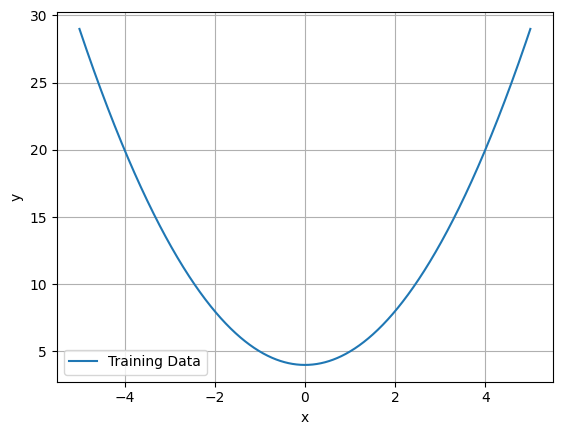

In [20]:
plt.plot(xx, yy, label='Training Data')

plt.grid()

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

In [21]:
x_mean = xx.mean()
x_max  = xx.max()
x_min  = xx.min()

y_mean = yy.mean()
y_max  = yy.max()
y_min  = yy.min() 




In [22]:
x_n  =  (xx - x_mean)/(x_max - x_min)
y_n  =  (yy - y_mean)/(y_max-y_min)

In [23]:
model = Sequential()

model.add(Input(shape=(1,)))

# Adding hidden layers


model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=20, activation='tanh'))

# Output layer


model.add(Dense(units=1, activation='tanh'))




In [24]:
model.compile(optimizer='SGD', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x=x_n, y=y_n, epochs=1000, batch_size=32)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 0.0939
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0920
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0894
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0891
Epoch 12/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0890
Epoch 13/1000
32/32 [====

32/32 [==============================] - 0s 2ms/step - loss: 0.0811
Epoch 102/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 103/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0803
Epoch 104/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 105/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 106/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 107/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 108/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0791
Epoch 109/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 110/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0785
Epoch 111/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 112/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 113/1000
32/3

32/32 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 200/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 201/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 202/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 203/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 204/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 205/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 206/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 207/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 208/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 209/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 210/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 211/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 298/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 299/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 300/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 301/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 302/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 303/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 304/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 305/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 306/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 307/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 308/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 309/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 396/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 397/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 398/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 399/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 400/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 401/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 402/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 403/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 404/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 405/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 406/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 407/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 494/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 495/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 496/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 497/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 498/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 499/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 500/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 501/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 502/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 503/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 504/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 505/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 592/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 593/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 594/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 595/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 596/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 597/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 598/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 599/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 600/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 601/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 602/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 603/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 690/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 691/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 692/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 693/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 694/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 695/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 696/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 697/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 698/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 699/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 700/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 701/1000
32/3

32/32 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 788/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 789/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 790/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 791/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 792/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 793/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 794/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 795/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 796/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 797/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 798/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 799/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 886/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 887/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 888/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 889/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 890/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 891/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 892/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 893/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 894/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 895/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 896/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 897/1000
32/3

32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 984/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 985/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 986/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 987/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 988/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 989/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 990/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 991/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 992/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 993/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 994/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 995/1000
32/3

In [27]:
y_pred_n = model.predict(x_n)

32/32 [==============================] - 0s 2ms/step


In [28]:
y_pred  = y_pred_n*(y_max-y_min) + y_mean

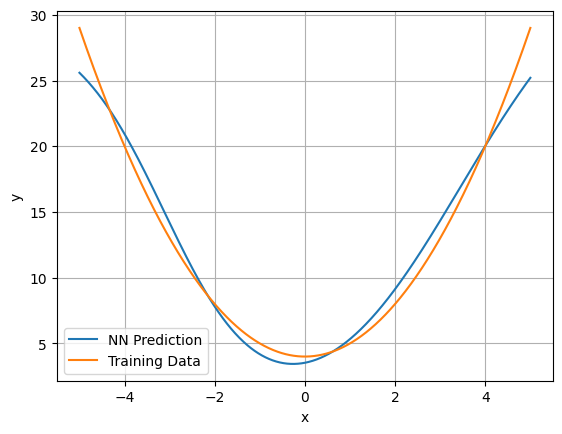

In [29]:

plt.plot(xx, y_pred, label='NN Prediction')
plt.plot(xx, yy, label='Training Data')

plt.grid()

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

In [ ]:
xx.dtype

dtype('float64')